Desafío - Inferencia e hipótesis

1. Considerando las variables earn, height y age, vamos a suponer que nuestro dataset fuera una población completa. (Prepara los datos adecuadamente).

    a. Realiza 12 pruebas (4 por cada variable) con muestras de tamaño n = 25, en cada caso, con niveles de significancia diferentes pero inferiores a 0,1, para confirmar o rechazar las siguientes hipótesis considerando las alternativas. Crea para ello una fórmula que reciba los parámetros adecuados y responda "con nivel de confianza del ...%, se acepta la hipótesis nula/alternativa".

    b. Calcula la media poblacional para cada variable. ¿Son correctos los resultados obtenidos por tus pruebas?

In [161]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("earnings.csv")
df

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,61,120.0,0,15000.0,15.0,White,18.0,18.0,18.0,6,1,2.0,0.0,0.0,82
1812,64,130.0,0,8000.0,8.0,White,12.0,12.0,12.0,1,1,1.0,7.0,7.0,33
1813,72,194.0,1,60000.0,60.0,White,12.0,12.0,12.0,2,1,2.0,0.0,0.0,50
1814,63,155.0,0,15000.0,15.0,Other,14.0,14.0,14.0,6,1,2.0,2.0,2.0,69


*** Media Muestral: 23574.89 HIPOTESIS ***
Media poblacional: 21147.30 de earn


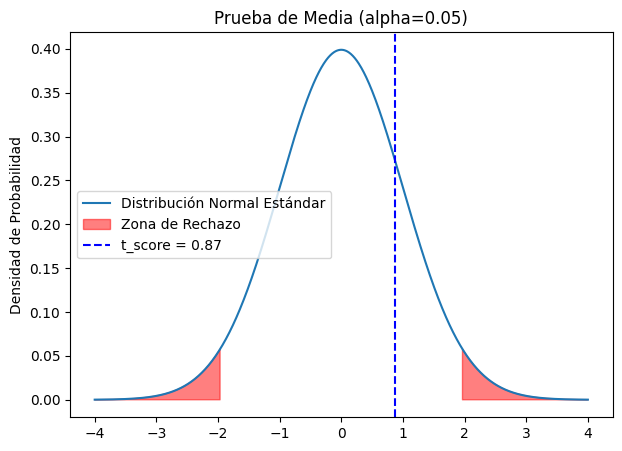


Como el valor p = 0.87 esta entre -1.96 y 1.96, > NO SE RECHAZA < la hipótesis para 23574.88643339472.

*** Media Muestral: 20000.00 HIPOTESIS ***
Media poblacional: 21147.30 de earn


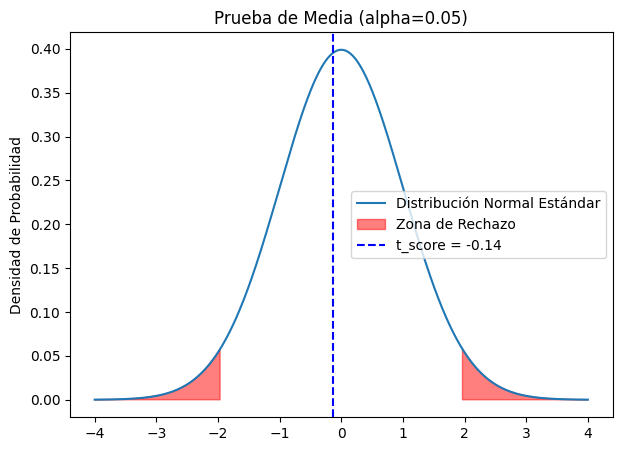


Como el valor p = -0.14 esta entre -1.96 y 1.96, > NO SE RECHAZA < la hipótesis para 20000.

*** Media Muestral: 35000.00 HIPOTESIS ***
Media poblacional: 21147.30 de earn


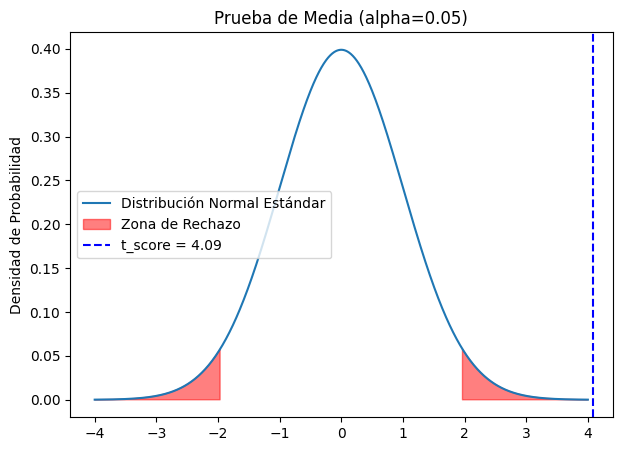


Como el valor p = 4.09 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 35000.

*** Media Muestral: 25000.00 HIPOTESIS ***
Media poblacional: 21147.30 de earn


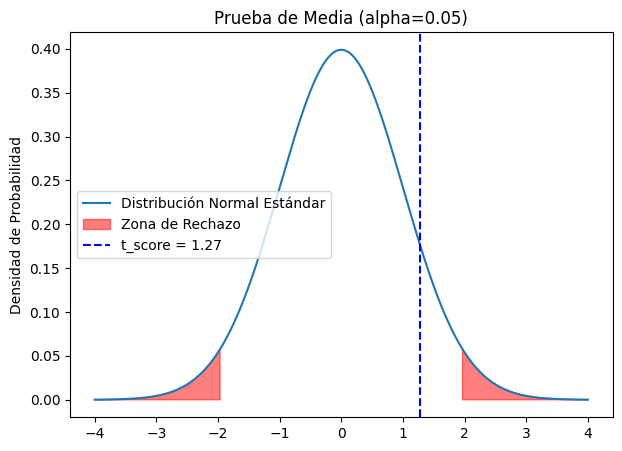


Como el valor p = 1.27 esta entre -1.96 y 1.96, > NO SE RECHAZA < la hipótesis para 25000.

*** Media Muestral: 32000.00 HIPOTESIS ***
Media poblacional: 21147.30 de earn


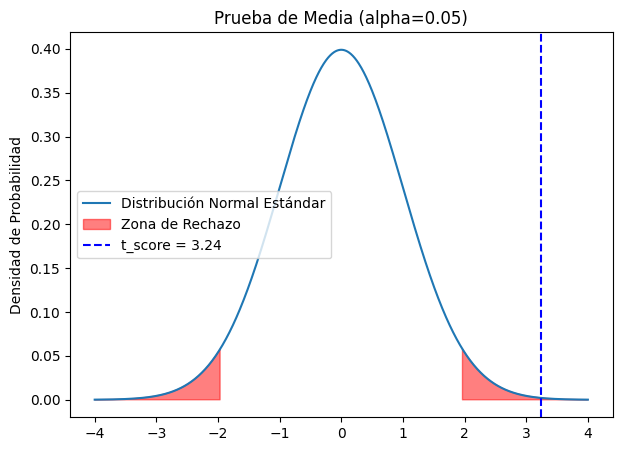


Como el valor p = 3.24 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 32000.



In [162]:
import seaborn as sns
from scipy.stats import norm, chi2, t
#PARA EARN
#quitar ceros
Earn_sin0 = df[df["earn"] != 0]
DatosMuestraE = Earn_sin0["earn"].sample(n=25, random_state=23)

#se define funcion
def pru_hipotesis (media_muestral):


    # Datos de la prueba
    #media_muestral = media_muestral    # Media de la muestra (x_bar)
    media_hipotesis = DatosMuestraE.mean()     # Valor de la hipótesis nula (mu_0)
    media_poblacional = df["earn"].mean()       #media poblacional
    desviacion_muestral = DatosMuestraE.std()   # Desviación estándar de la muestra (s)
    n_muestras = 25             # Tamaño de la muestra (n)

    # 1. Calcular el estadístico t
    t_score = (media_muestral - media_hipotesis) / (desviacion_muestral / np.sqrt(n_muestras))

    # 2. Calcular los grados de libertad
    grados_libertad = n_muestras - 1

    # 3. Calcular el valor p (prueba bilateral)
    # La función t.sf() calcula la probabilidad de la "cola superior" (1 - CDF)
    p_value = 2 * t.sf(np.abs(t_score), grados_libertad)

    # Imprimir los resultados
    print(f"*** Media Muestral: {media_muestral:.2f} HIPOTESIS ***")
    print(f"Media poblacional: {media_poblacional:.2f} de earn")
    #print(f"Estadístico t: {t_score:.2f}")
    #print(f"Grados de libertad: {grados_libertad}")
    #print(f"Valor p (bilateral): {p_value:.2f}")
   

    # Nivel de significancia (alpha) que se eligió
    alpha = 0.05

    fig, ax = plt.subplots(figsize=(7, 5))

    #if tipo_prueba == 'media':
    #z_calculado = (estadistico_muestra - valor_hipotesis) / (desviacion_estandar / np.sqrt(n))
    z_critico = norm.ppf(1 - alpha / 2)

        # Generar gráfico para la prueba de media
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, 0, 1)
    ax.plot(x, y, label='Distribución Normal Estándar')
        
    # Sombreado de las zonas de rechazo
    ax.fill_between(x, 0, y, where=(x > z_critico) | (x < -z_critico), color='red', alpha=0.5, label='Zona de Rechazo')
        
        # Marcar el valor z calculado
    ax.axvline(t_score, color='blue', linestyle='--', label=f't_score = {t_score:.2f}')
    ax.set_title(f'Prueba de Media (alpha={alpha})')
    ax.set_xlabel('')
    ax.set_ylabel('Densidad de Probabilidad')
    ax.legend()
    plt.show()

    # Tomar la decisión
    if -1*z_critico < t_score and z_critico > t_score:
        print(f"\nComo el valor p = {t_score:.2f} esta entre {-1*z_critico:.2f} y {z_critico:.2f}, > NO SE RECHAZA < la hipótesis para {media_muestral}.")
        
    else:
        print(f"\nComo el valor p = {t_score:.2f} es mayor que {z_critico:.2f} o menor de {-1*z_critico:.2f}, > SE RECHAZA < la hipótesis para {media_muestral}.")
    
    print("===========================================================================================================\n")

pru_hipotesis(Earn_sin0["earn"].mean())
pru_hipotesis(20000)
pru_hipotesis(35000)
pru_hipotesis(25000)
pru_hipotesis(32000)


*** Media Muestral: 66.57 HIPOTESIS ***
Media poblacional: 66.57 de height


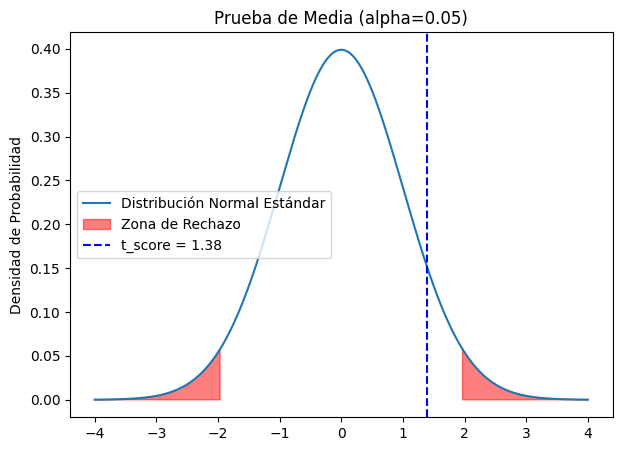


Como el valor p = 1.38 esta entre -1.96 y 1.96, > NO SE RECHAZA < la hipótesis para 66.56883259911895.

*** Media Muestral: 55.00 HIPOTESIS ***
Media poblacional: 66.57 de height


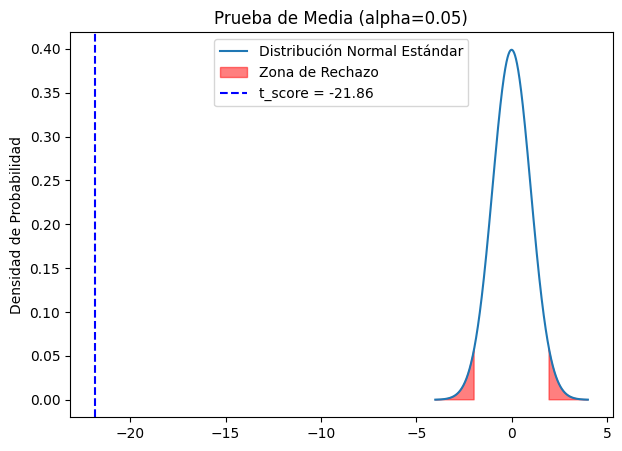


Como el valor p = -21.86 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 55.

*** Media Muestral: 68.00 HIPOTESIS ***
Media poblacional: 66.57 de height


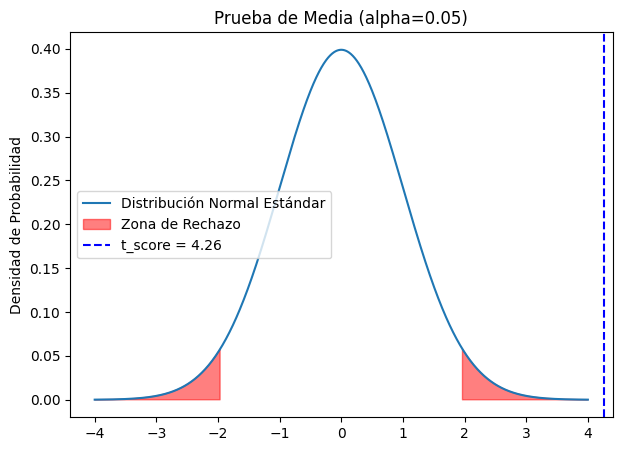


Como el valor p = 4.26 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 68.

*** Media Muestral: 63.00 HIPOTESIS ***
Media poblacional: 66.57 de height


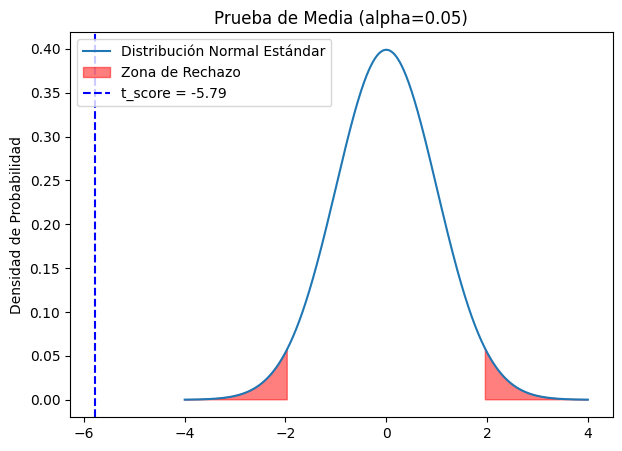


Como el valor p = -5.79 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 63.

*** Media Muestral: 70.00 HIPOTESIS ***
Media poblacional: 66.57 de height


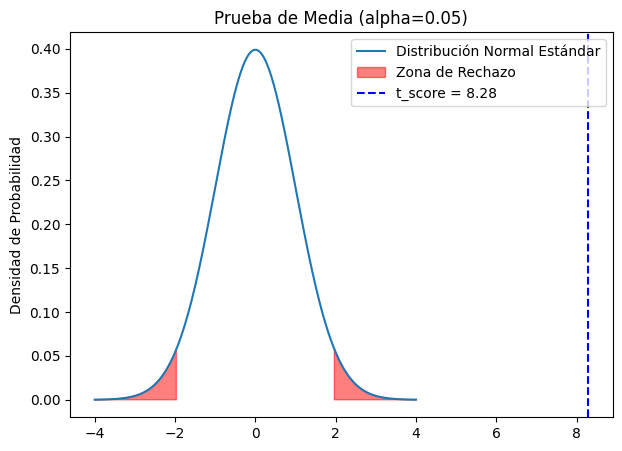


Como el valor p = 8.28 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 70.



In [163]:
Height_sin0 = df[df["height"] != 0]
DatosMuestraH = Height_sin0["height"].sample(n=25, random_state=23)

#se define funcion
def pru_hipotesis_H (media_muestral):


    # Datos de la prueba
    #media_muestral = media_muestral    # Media de la muestra (x_bar)
    media_hipotesis = DatosMuestraH.mean()     # Valor de la hipótesis nula (mu_0)
    media_poblacional = df["height"].mean()     # Media poblacional
    desviacion_muestral = DatosMuestraH.std()   # Desviación estándar de la muestra (s)
    n_muestras = 25             # Tamaño de la muestra (n)

    # 1. Calcular el estadístico t
    t_score = (media_muestral - media_hipotesis) / (desviacion_muestral / np.sqrt(n_muestras))

    # 2. Calcular los grados de libertad
    grados_libertad = n_muestras - 1

    # 3. Calcular el valor p (prueba bilateral)
    # La función t.sf() calcula la probabilidad de la "cola superior" (1 - CDF)
    p_value = 2 * t.sf(np.abs(t_score), grados_libertad)

    # Imprimir los resultados
    print(f"*** Media Muestral: {media_muestral:.2f} HIPOTESIS ***")
    print(f"Media poblacional: {media_poblacional:.2f} de height")
   

    # Nivel de significancia (alpha) que se eligió
    alpha = 0.05

    fig, ax = plt.subplots(figsize=(7, 5))

    #if tipo_prueba == 'media':
    #z_calculado = (estadistico_muestra - valor_hipotesis) / (desviacion_estandar / np.sqrt(n))
    z_critico = norm.ppf(1 - alpha / 2)

        # Generar gráfico para la prueba de media
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, 0, 1)
    ax.plot(x, y, label='Distribución Normal Estándar')
        
    # Sombreado de las zonas de rechazo
    ax.fill_between(x, 0, y, where=(x > z_critico) | (x < -z_critico), color='red', alpha=0.5, label='Zona de Rechazo')
        
        # Marcar el valor z calculado
    ax.axvline(t_score, color='blue', linestyle='--', label=f't_score = {t_score:.2f}')
    ax.set_title(f'Prueba de Media (alpha={alpha})')
    ax.set_xlabel('')
    ax.set_ylabel('Densidad de Probabilidad')
    ax.legend()
    plt.show()

    # Tomar la decisión
    if -1*z_critico < t_score and z_critico > t_score:
        print(f"\nComo el valor p = {t_score:.2f} esta entre {-1*z_critico:.2f} y {z_critico:.2f}, > NO SE RECHAZA < la hipótesis para {media_muestral}.")
        
    else:
        print(f"\nComo el valor p = {t_score:.2f} es mayor que {z_critico:.2f} o menor de {-1*z_critico:.2f}, > SE RECHAZA < la hipótesis para {media_muestral}.")
    
    print("===========================================================================================================\n")

pru_hipotesis_H(Height_sin0['height'].mean())
pru_hipotesis_H(55)
pru_hipotesis_H(68)
pru_hipotesis_H(63)
pru_hipotesis_H(70)

*** Media Muestral: 42.93 HIPOTESIS ***
Media poblacional: 42.93 de age


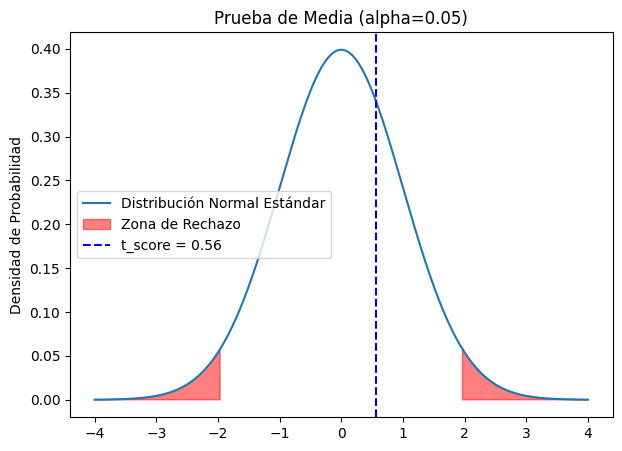


Como el valor p = 0.56 esta entre -1.96 y 1.96, > NO SE RECHAZA < la hipótesis para 42.934471365638764.

*** Media Muestral: 44.00 HIPOTESIS ***
Media poblacional: 42.93 de age


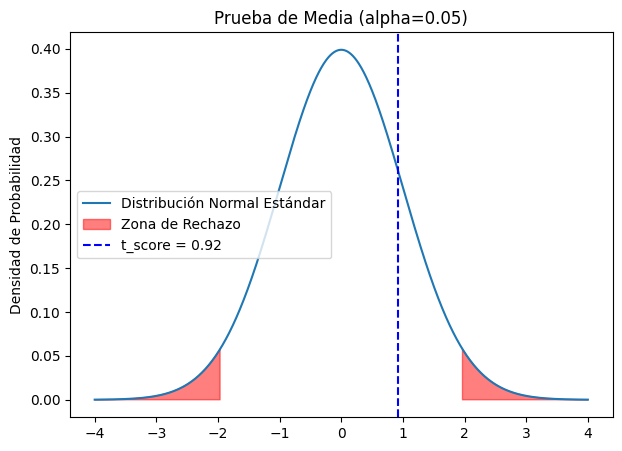


Como el valor p = 0.92 esta entre -1.96 y 1.96, > NO SE RECHAZA < la hipótesis para 44.

*** Media Muestral: 56.00 HIPOTESIS ***
Media poblacional: 42.93 de age


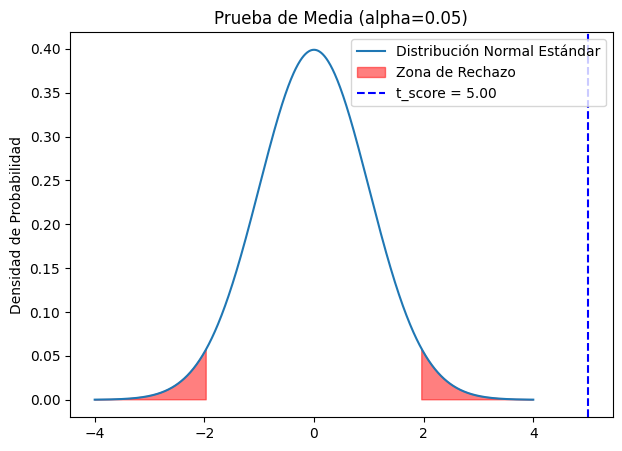


Como el valor p = 5.00 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 56.

*** Media Muestral: 51.00 HIPOTESIS ***
Media poblacional: 42.93 de age


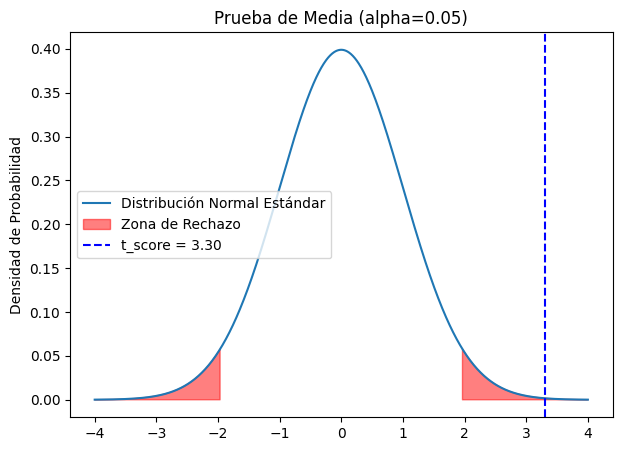


Como el valor p = 3.30 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 51.

*** Media Muestral: 62.00 HIPOTESIS ***
Media poblacional: 42.93 de age


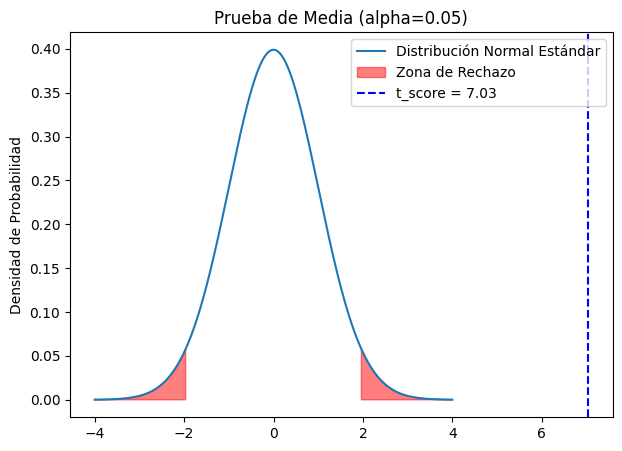


Como el valor p = 7.03 es mayor que 1.96 o menor de -1.96, > SE RECHAZA < la hipótesis para 62.



In [164]:
Age_sin0 = df[df["age"] != 0]
DatosMuestraA = Age_sin0["age"].sample(n=25, random_state=23)

#se define funcion
def pru_hipotesis_A (media_muestral):


    # Datos de la prueba
    #media_muestral = media_muestral    # Media de la muestra (x_bar)
    media_hipotesis = DatosMuestraA.mean()     # Valor de la hipótesis nula (mu_0)
    media_poblacional = df["age"].mean()
    desviacion_muestral = DatosMuestraA.std()   # Desviación estándar de la muestra (s)
    n_muestras = 25             # Tamaño de la muestra (n)

    # 1. Calcular el estadístico t
    t_score = (media_muestral - media_hipotesis) / (desviacion_muestral / np.sqrt(n_muestras))

    # 2. Calcular los grados de libertad
    grados_libertad = n_muestras - 1

    # 3. Calcular el valor p (prueba bilateral)
    # La función t.sf() calcula la probabilidad de la "cola superior" (1 - CDF)
    p_value = 2 * t.sf(np.abs(t_score), grados_libertad)

    # Imprimir los resultados
    print(f"*** Media Muestral: {media_muestral:.2f} HIPOTESIS ***")
    print(f"Media poblacional: {media_poblacional:.2f} de age")

    # Nivel de significancia (alpha) que se eligió
    alpha = 0.05

    fig, ax = plt.subplots(figsize=(7, 5))

    #if tipo_prueba == 'media':
    #z_calculado = (estadistico_muestra - valor_hipotesis) / (desviacion_estandar / np.sqrt(n))
    z_critico = norm.ppf(1 - alpha / 2)

        # Generar gráfico para la prueba de media
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, 0, 1)
    ax.plot(x, y, label='Distribución Normal Estándar')
        
    # Sombreado de las zonas de rechazo
    ax.fill_between(x, 0, y, where=(x > z_critico) | (x < -z_critico), color='red', alpha=0.5, label='Zona de Rechazo')
        
        # Marcar el valor z calculado
    ax.axvline(t_score, color='blue', linestyle='--', label=f't_score = {t_score:.2f}')
    ax.set_title(f'Prueba de Media (alpha={alpha})')
    ax.set_xlabel('')
    ax.set_ylabel('Densidad de Probabilidad')
    ax.legend()
    plt.show()

    # Tomar la decisión
    if -1*z_critico < t_score and z_critico > t_score:
        print(f"\nComo el valor p = {t_score:.2f} esta entre {-1*z_critico:.2f} y {z_critico:.2f}, > NO SE RECHAZA < la hipótesis para {media_muestral}.")
        
    else:
        print(f"\nComo el valor p = {t_score:.2f} es mayor que {z_critico:.2f} o menor de {-1*z_critico:.2f}, > SE RECHAZA < la hipótesis para {media_muestral}.")
    
    print("===========================================================================================================\n")

pru_hipotesis_A(Age_sin0['age'].mean())
pru_hipotesis_A(44)
pru_hipotesis_A(56)
pru_hipotesis_A(51)
pru_hipotesis_A(62)

2. Crea una función que estime la proporción de hombres en el dataset, considerando una muestra de 50 individuos, con niveles de significancia de 0,05 y 0,01. Escribe con palabras tus resultados ejecutar la función e interpreta. Compara con la proporción real.

In [167]:
def Proporcion_hombres(signif, n):
    print(f'PARA GRADO DE SIGNIFICANCIA: {signif*100}%')
    prop_hombre_poblacion = df[df["male"] == 1]['male'].sum()
    Poblacion = len(df)
    
    DatosMuestraM = df["male"].sample(n=n, random_state=42)
    desviacion = DatosMuestraM.std()
    media = DatosMuestraM.mean()
   
    #print(DatosMuestraM)
    prop_hombre_poblacion_selecc = DatosMuestraM.sum()
    p_real = df["male"].mean()

    #COMPARACION
    print(f'Hombres de la poblacion {prop_hombre_poblacion:.2f}\nProporcion hombres de la poblacion = {(prop_hombre_poblacion/Poblacion)*100:.2f}%')
    print(f'Hombres de la poblacion seleccionada {prop_hombre_poblacion_selecc:.2f}\nProporcion hombres de la muestra seleccionada = {(prop_hombre_poblacion_selecc/50)*100:.2f}%\n-----------')

    #CALCULO DEL ERROR STANDAR
    se = desviacion / np.sqrt(n)
    print(f"Error estandar= {se:.2f}")
    print(f'Desviacion standar de la muestra = {desviacion:.2f}')
    #print(p_real)

    #estadistico t
    t_stat = (media - p_real) / se

    #valor p para pruebas
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 1))
    print(f'p_value= {p_value:.4f}, > osea {p_value*100:.2f}%')
    
    if p_value < signif:
        print("** La proporcion muestral SI difiere de la proporcion poblacional **")
    else:
        print("** La proporcion muestral NO difiere de la proporcion poblacional **")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

Proporcion_hombres(0.05, 50)
Proporcion_hombres(0.01, 50)
         


PARA GRADO DE SIGNIFICANCIA: 5.0%
Hombres de la poblacion 675.00
Proporcion hombres de la poblacion = 37.17%
Hombres de la poblacion seleccionada 27.00
Proporcion hombres de la muestra seleccionada = 54.00%
-----------
Error estandar= 0.07
Desviacion standar de la muestra = 0.50
p_value= 0.0221, > osea 2.21%
** La proporcion muestral SI difiere de la proporcion poblacional **
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

PARA GRADO DE SIGNIFICANCIA: 1.0%
Hombres de la poblacion 675.00
Proporcion hombres de la poblacion = 37.17%
Hombres de la poblacion seleccionada 27.00
Proporcion hombres de la muestra seleccionada = 54.00%
-----------
Error estandar= 0.07
Desviacion standar de la muestra = 0.50
p_value= 0.0221, > osea 2.21%
** La proporcion muestral NO difiere de la proporcion poblacional **
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



R./ Los datos anteriores quiere decir que entre el modelo de muestra con significancia 5% si tiene una diferencia con respécto a la poblacion pporque queda dentro de la zona de rechazo osea que esta por denajo del 5% pero mayor a la significancia de 1%, lo que quiere decir es que si queremos rechazar la muestra para la significancia ddel 5% tocaria rechazarla, pero si tomamos un parametro de significancia 1% la muestra se alcanza a salvar por quedar pór enciama del 1%.

3. Considerando el dataset como una muestra, verifica si el género (male=1 significa ‘hombre”) influye sobre el sueldo “earn” de las personas. Explica y justifica tu procedimiento.

In [168]:
SalH = df[df["male"] == 1]
PHombres = SalH["earn"].mean()

SalM = df[df["male"] == 0]
PMujeres = SalM["earn"].mean()

print(f'Promedio salarial de las mujeres: {PMujeres:.2f}')
print(f'Promedio salarial de las hombres: {PHombres:.2f}')
print(f'»Las mujeres en promedio ganan un {(PMujeres/PHombres)*100:.3f}% de lo que en promedio ganan los hombres.')

Promedio salarial de las mujeres: 15847.94
Promedio salarial de las hombres: 30105.18
»Las mujeres en promedio ganan un 52.642% de lo que en promedio ganan los hombres.


R./ Considerando los datos del dataset, se puede observar que las mujeres tienen un ingreso mas bajo que el de los hombres solo un 52.6% del salario de los hombres lo que QUIZA influye en el nivel salarial el genero convirtiendo el genero un una ventaja salarial apreciable 